<a href="https://colab.research.google.com/github/Rimo-rimo/boostcamp_AI/blob/main/Data_Visualization/3_1_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 4.4 MB/s 
     |████████████████████████████████| 895 kB 82.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# 3-1. Text

## 1. Text API in Matplotlib

기본적인 요소를 다시 한 번 살펴보겠습니다.

|pyplot API|Objecte-oriented API|description|
|-|-|-|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|
|`figtext`|`text`|figure text|
|`text`|`text`|Axes taext|
|`annoatate`|`annotate`|Axes annotation with arrow|

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.__version__

'3.5.1'

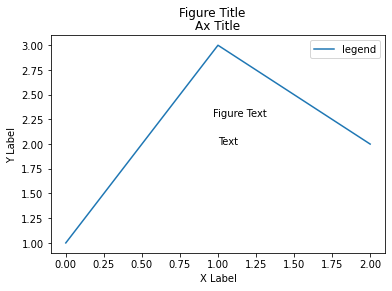

In [ ]:
fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend')
ax.legend()

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1,y=2, s='Text')
fig.text(0.5, 0.6, s='Figure Text') # fig전체 비율에서 0.5 : 0.6

plt.show()

## 2. Text Properties

### 2-1. Font Components

가장 쉽게 바꿀 수 있는 요소로는 다음 요소가 있습니다.

- `family`
- `size` or `fontsize`
- `style` or `fontstyle`
- `weight` or `fontweight`



글씨체에 따른 가독성 관련하여는 다음 내용을 참고하면 좋습니다.

- [Material Design : Understanding typography](https://material.io/design/typography/understanding-typography.html)
- [StackExchange : Is there any research with respect to how font-weight affects readability?](https://ux.stackexchange.com/questions/52971/is-there-any-research-with-respect-to-how-font-weight-affects-readability)



아래는 [Fonts Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html)입니다.

![](https://matplotlib.org/stable/_images/sphx_glr_fonts_demo_001.png)

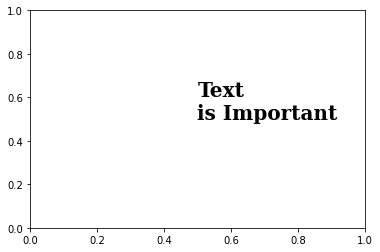

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
       )


plt.show()

### 2-2. Details

폰트 자체와는 조금 다르지만 커스텀할 수 있는 요소들입니다.

- `color`
- `linespacing` -> 줄과 줄 사이의 간격
- `backgroundcolor`
- `alpha`
- `zorder` -> ppt에서의 "앞으로 가져오기"
- `visible`


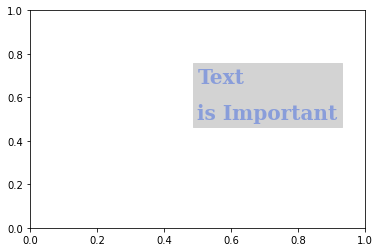

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=0.5
       )


plt.show()

### 2-3. Alignment

정렬과 관련하여 이런 요소들을 조정할 수 있습니다.

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`


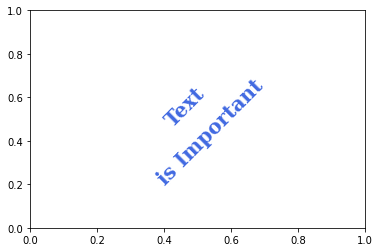

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation=45 # 45도
       )


plt.show()

### 2-4. Advanced

- `bbox`

- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

![image.png](https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)

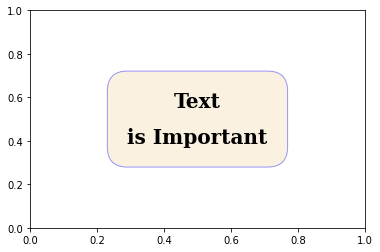

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='black',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal', # vertical?
        bbox=dict(boxstyle='round', 
                  facecolor='wheat', 
                  alpha=0.4,
                  edgecolor = "blue",
                  pad=1) # facecolor = 박스색
       )


plt.show()

## 3. Text API 별 추가 사용법 with 실습

### 3-0. 기본적인 플롯

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
student = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exams.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,bachelor's degree,standard,completed,84,97,100
1,male,group C,some high school,standard,none,76,72,71
2,female,group B,associate's degree,standard,none,59,73,70
3,male,group C,some high school,standard,none,71,75,64
4,female,group E,associate's degree,standard,completed,92,99,100


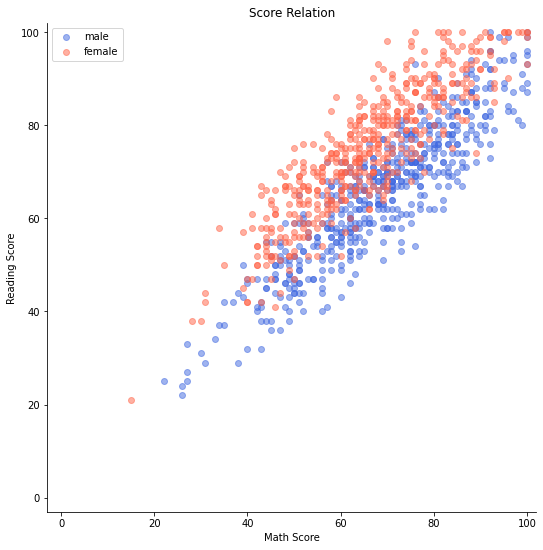

In [ ]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 
ax.legend()   

plt.show()

### 3-1. Title & Legend

- 제목의 위치 조정하기
- 범례에 제목, 그림자 달기, 위치 조정하기

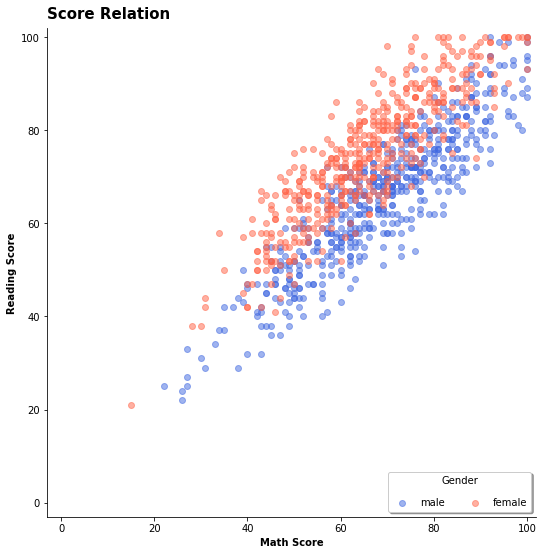

In [ ]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    loc='lower right',
    # bbox_to_anchor=[1.2, 0.5] #이렇게 좌표로도 설정 가능
    ncol=2
)

plt.show()

- bbox_to_anchor을 더 이해하고 싶다면 [link](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180) 참고

### 3-2. Ticks & Text

- tick을 없애거나 조정하는 방법
- text의 alignment가 필요한 이유

In [ ]:
student["math score"].head()

0    84
1    76
2    59
3    71
4    92
Name: math score, dtype: int64

In [ ]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

11 - 20       1
21 - 30       9
31 - 40      22
41 - 50     118
51 - 60     182
61 - 70     254
71 - 80     209
81 - 90     142
91 - 100     63
Name: math-range, dtype: int64

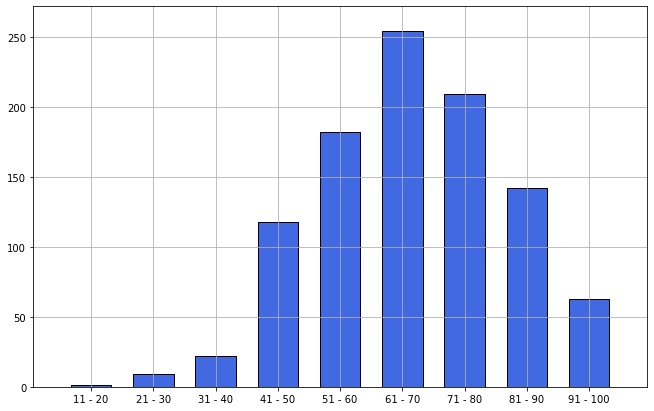

In [ ]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.07)
ax.grid()
plt.show()

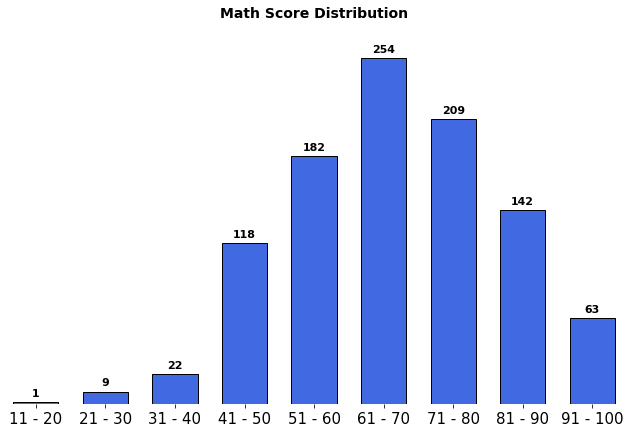

In [ ]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False) #4변을 제거
ax.set_yticks([]) # y축의 눈금 제거
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index,fontsize=15)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

### 3-3. Annotate

- 화살표 사용하기

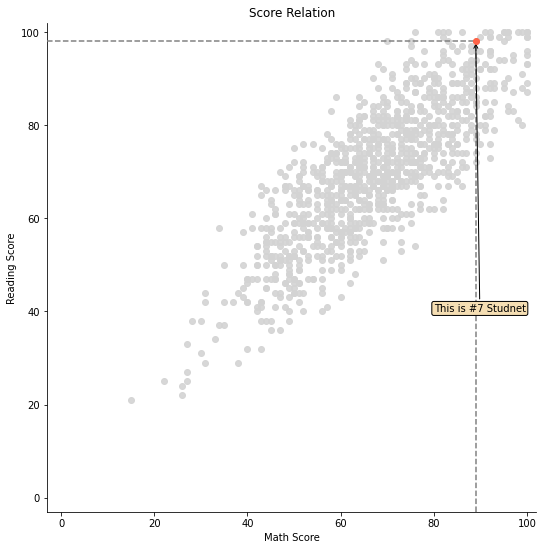

In [ ]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 7

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()